# Wallace Esteves de Carvalho
### Student ID : 2020326

Fig. 1 
(a)	The graph in Fig. 1 is a visualisation of the problem. 


Questions 
1	A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages. 
(a)	The graph in Fig. 1 is a visualisation of the problem. 
(i)	Identify the differences between a graph and a tree.  
(ii)	Explain in detail how the graph is an abstraction of the problem. 
(iii)	Identify the advantages of using a visualisation such as the one shown in Fig. 1. 
(b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. 
2	The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed. 


# 

### i Identify the differences between a graph and a tree

Structure: Think of a graph as a web where nodes are linked together by the edges. In this web, you can circle back to the same point by following different paths. A tree, on the other hand, is like a family tree. It's special because you can't go in loopsm each member (node) comes from exactly one parent, except for the ancestor at the top (the root).

Connectivity: In a tree, if you're trying to get from one member to another, there's only one way to trace your lineage without repeating steps. But in a graph, it's like having multiple roads between cities – you can take different routes to reach the same destination.

Hierarchy: Trees are like a kingdom where there's one ruler at the top (the root), and everyone else falls under them in a clear order. Graphs are more like a network of friends; there's no compulsory top dog or a structured pecking orde





### ii  Explain in detail how the graph is an abstraction of the problem.

Representation of States and Transitions: Each node in the graph can represent a state or stage in a puzzle, and edges represent possible transitions or steps from one state to another. This simplifies the complexity of the problem by breaking it down into discrete, manageable parts.

Simplification and Focus: The graph abstracts the puzzle, reducing it to essential elements (states and transitions). This focus allows for easier identification of possible solutions and pathways, stripping away extraneous details that might complicate problem-solving.

Visualization of Complex Relationships: The graphical representation helps in visualizing how different stages are interconnected. It makes it easier to see how one might progress from the start (A) to the solution (S), considering various intermediary steps.

### iii  Identify the advantages of using a visualisation such as the one shown in Fig. 1

The visual format allows for quick identification of potential paths to the solution. It's easier to spot direct routes, possible shortcuts, or dead ends. Visualization aids in strategizing the approach to the problem, helping in planning routes, anticipating challenges, and understanding the relationship between different stages more effectively. Additionally, in a team or educational setting, a visual representation like this graph makes it easier to communicate ideas, discuss strategies, and collaborate on finding solutions.tions.

# Creating the graphic

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

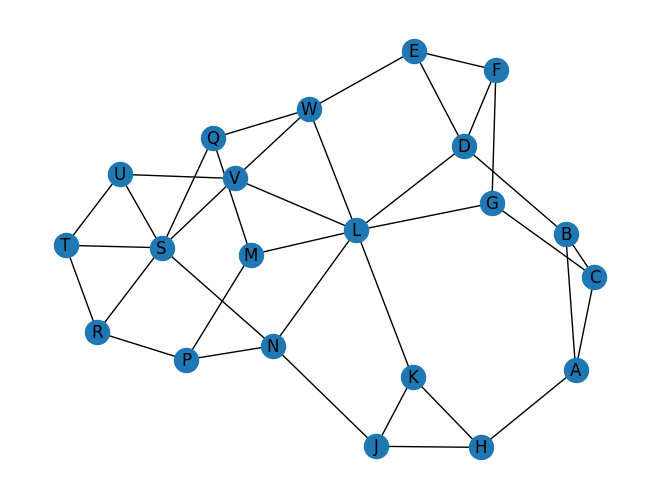

In [2]:
graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
}

G = nx.Graph(graph)


nx.draw(G, with_labels=True)
plt.show()

## (b)	Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. 

In [3]:
import heapq

def dijkstra(graph, start, end):
    queue = [(0, start, ())]  
    seen = set()
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end:
                return (cost, path)

            for v2, c in graph.get(v1, {}).items():
                if v2 in seen: continue
                next = cost + c
                heapq.heappush(queue, (next, v2, path))
    return float("inf"), []

shortest_distance, shortest_path  = dijkstra(graph, 'A', 'S')


def extract_path(stack):
    path = []
    while stack:
        node, stack = stack
        path.append(node)
    return path[::-1]  


shortest_path = extract_path(shortest_path)

(shortest_distance, shortest_path)



(17, ['A', 'B', 'C', 'G', 'L', 'N', 'S'])

### The algorithm explored various paths incrementally, updating the shortest path as it discovered lower-cost routes, and eventually arrived at the shortest path with a total cost of 17 through the sequence of nodes A -> B -> C -> G -> L -> N -> S.


### 

### The visualization of Dijkstra's algorithm shows the progression of the shortest path search from node 'A' to node 'S' across multiple steps. Each step highlights the current shortest path explored by the algorithm in red until the final path is found, which is then highlighted in green.

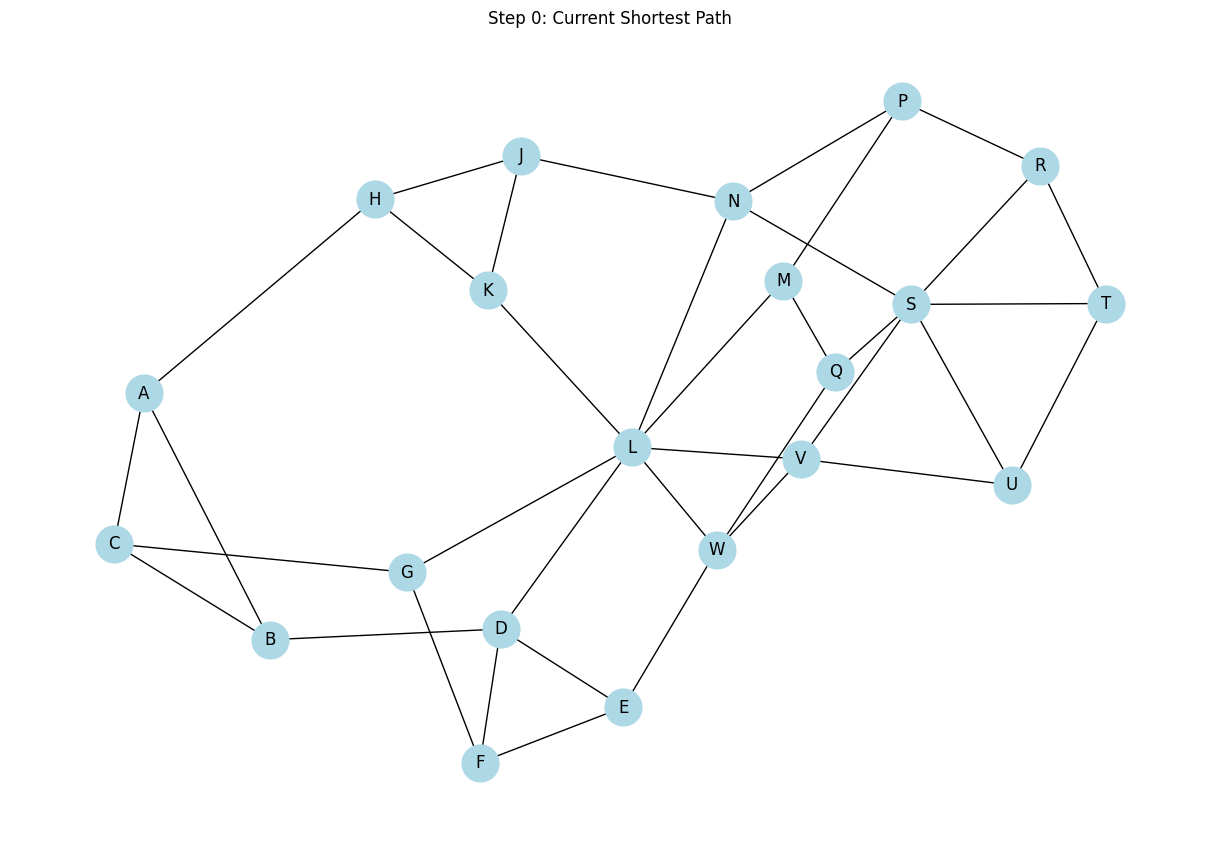

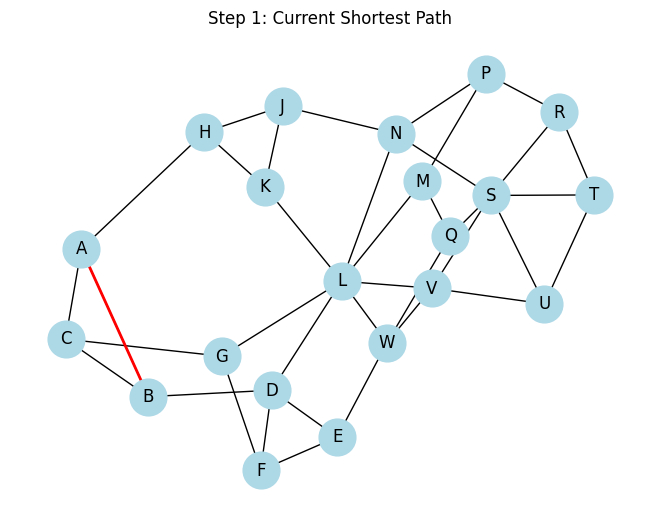

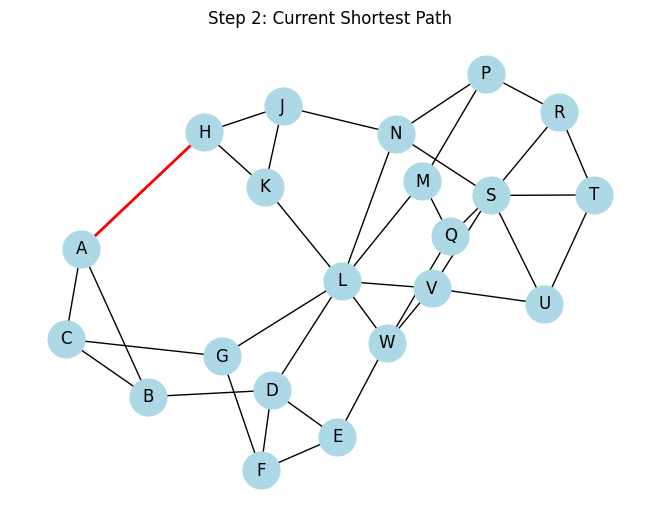

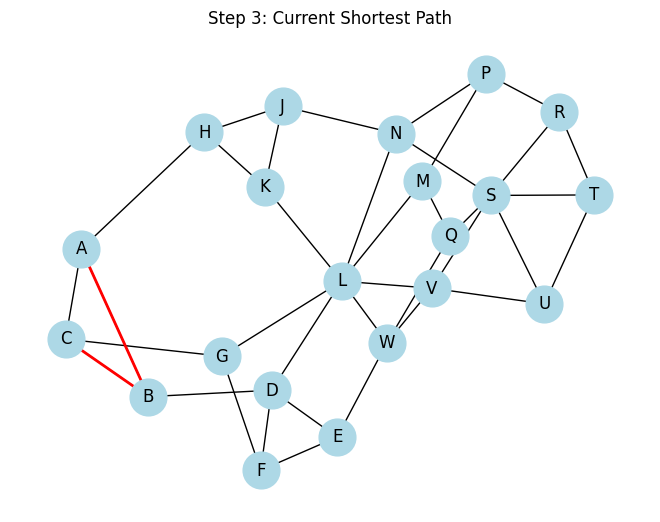

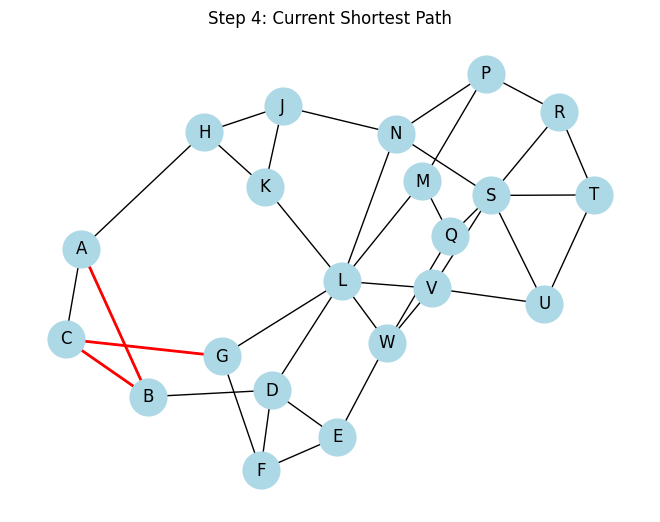

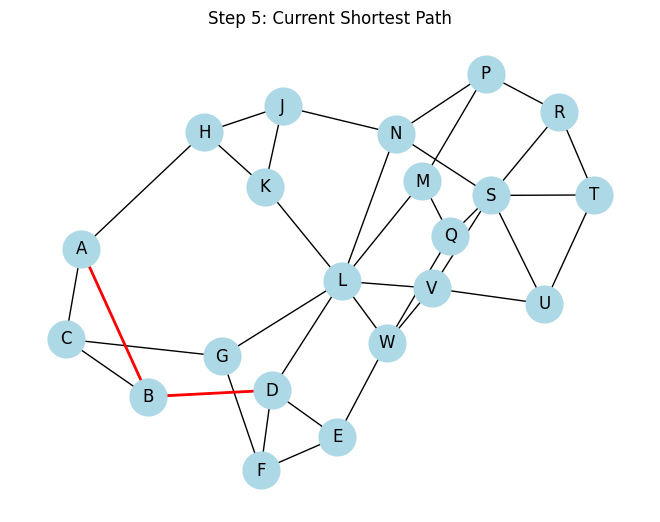

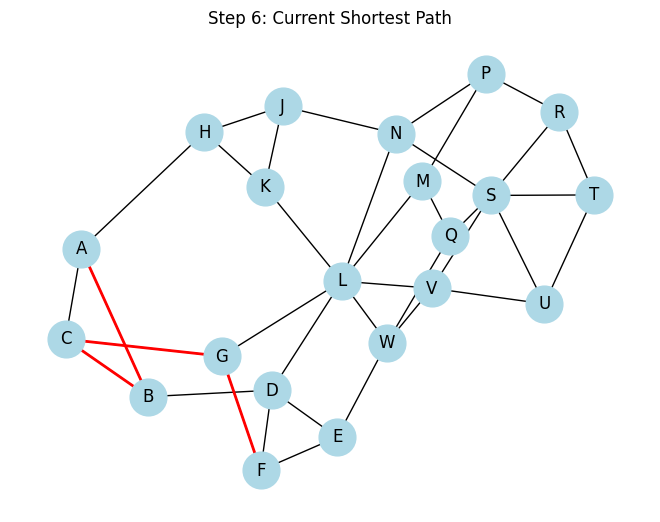

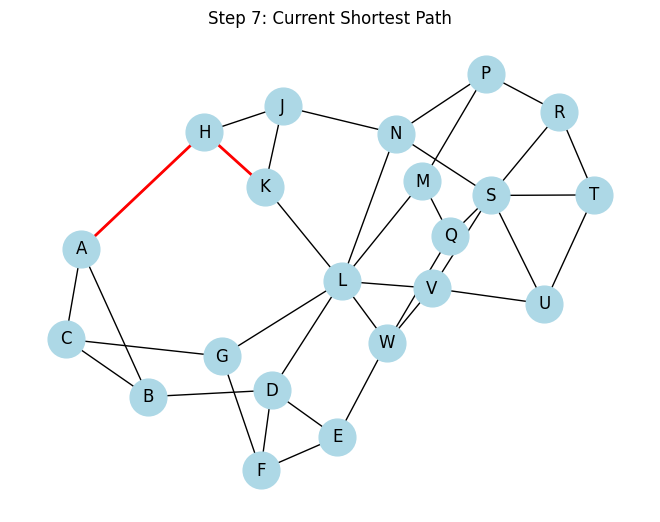

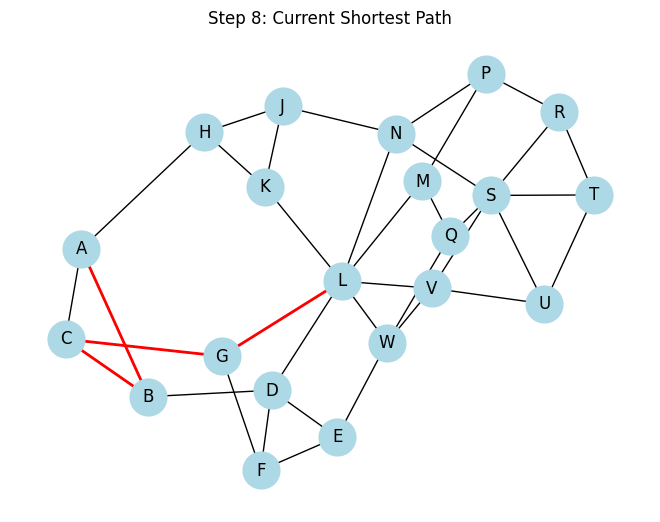

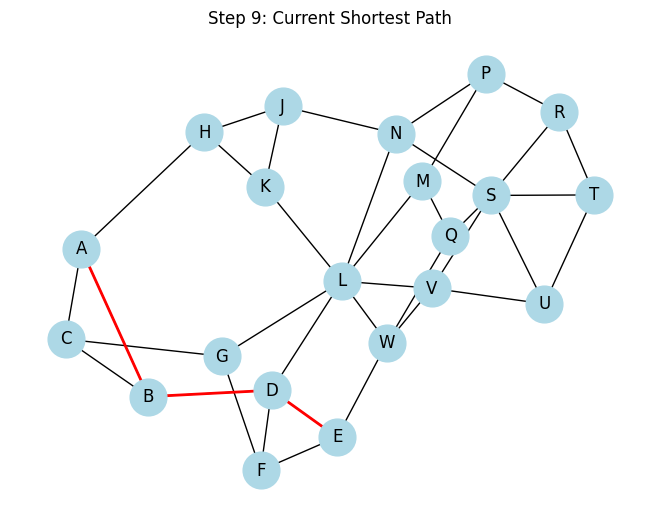

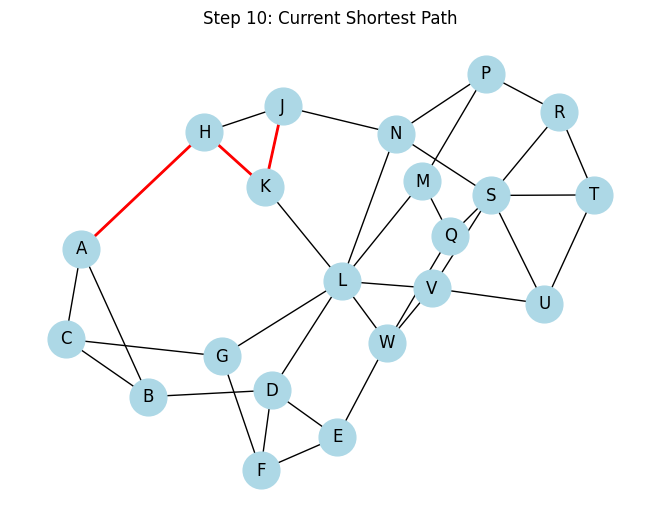

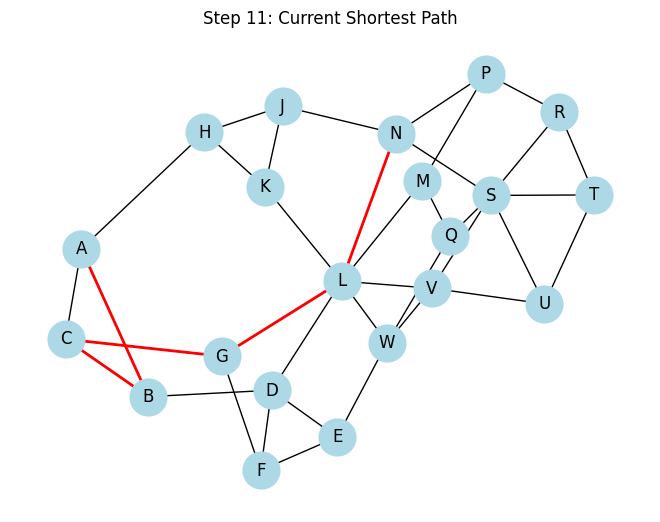

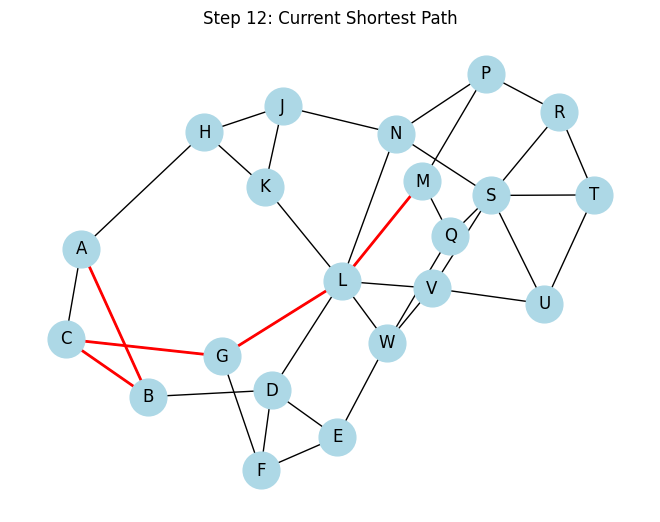

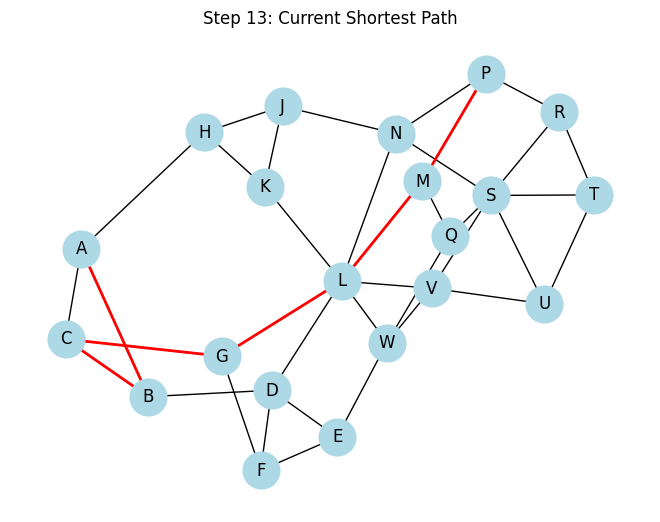

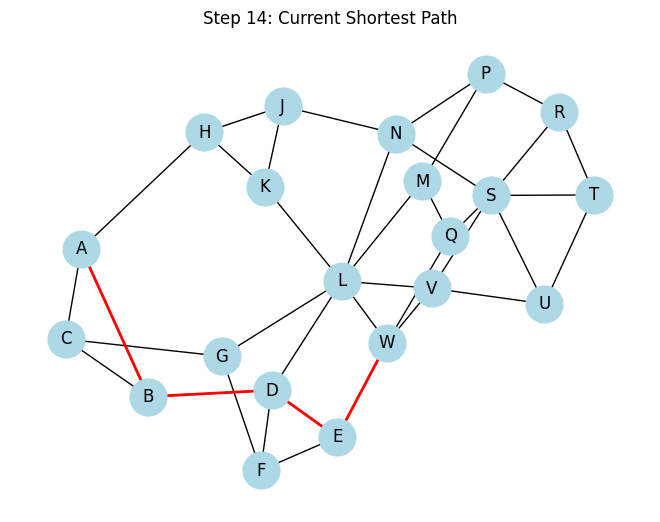

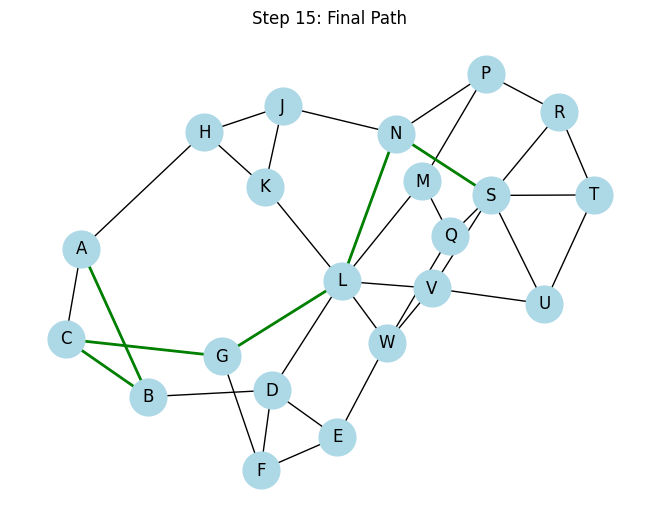

In [4]:
def dijkstra_path_visualization(graph, start, end):
    # Initialize priority queue
    queue = [(0, start, ())]  # (priority, node, path)
    seen = set()
    paths = {start: (None, 0)}  # {node: (previous_node, total_distance)}
    
    # Plot initial graph
    G_viz = nx.Graph()
    for node, edges in graph.items():
        for adjacent, weight in edges.items():
            G_viz.add_edge(node, adjacent, weight=weight)
    
    pos = nx.spring_layout(G_viz)
    plt.figure(figsize=(12, 8))
    
    # Run the algorithm
    step = 0
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == end:
                # Draw final path
                final_path = extract_path(path)
                final_edges = list(zip(final_path[:-1], final_path[1:]))
                nx.draw(G_viz, pos, with_labels=True, node_size=700, node_color='lightblue')
                nx.draw_networkx_edges(G_viz, pos, edgelist=final_edges, edge_color='green', width=2)
                plt.title(f'Step {step}: Final Path')
                plt.show()
                return (cost, path)
                
            for v2, c in graph.get(v1, {}).items():
                if v2 in seen: continue
                next = cost + c
                paths[v2] = (v1, next)
                heapq.heappush(queue, (next, v2, path))
            
            # Plot current state of the graph with the path so far
            current_path = extract_path(path)
            current_edges = list(zip(current_path[:-1], current_path[1:]))
            nx.draw(G_viz, pos, with_labels=True, node_size=700, node_color='lightblue')
            nx.draw_networkx_edges(G_viz, pos, edgelist=current_edges, edge_color='red', width=2)
            plt.title(f'Step {step}: Current Shortest Path')
            plt.show()
            step += 1

    return float("inf"), []

shortest_distance, shortest_path = dijkstra_path_visualization(graph, 'A', 'S')

# Question 2
## The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed

In [5]:
# Heuristic function for A* (Haversine distance, simplified as straight line distance)
def heuristic(node, end, graph):
    # For the purpose of this demonstration, we will use a simplistic heuristic:
    # number of steps from the node to the end if directly connected or infinity if not
    return 1 if end in graph[node] else float('inf')

# Implementation of the A* algorithm
def a_star_algorithm(graph, start, end):
    # Initialize both open and closed list
    open_list = set([start])
    closed_list = set([])
    
    # Distances and parents
    g = {}  # Actual movement cost to each position from the start position
    parents = {}  # Parents contains an adjacency map of all nodes
    
    # Distance from start to start is zero
    g[start] = 0
    # Start node is in the open list
    parents[start] = start
    
    while len(open_list) > 0:
        n = None

        # Find a node with the lowest value of f() - evaluation function
        for v in open_list:
            if n == None or g[v] + heuristic(v, end, graph) < g[n] + heuristic(n, end, graph):
                n = v

        if n == None:
            print('Path does not exist!')
            return None

        # If the current node is the end node
        if n == end:
            reconst_path = []

            # Reconstruct the path
            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(start)

            reconst_path.reverse()

            print('Path found: {}'.format(reconst_path))
            return reconst_path

        # For all neighbors of the current node
        for (m, weight) in graph[n].items():
            # If the current node isn't both in open and closed list
            # add it to open list and note n as it's parent
            if m not in open_list and m not in closed_list:
                open_list.add(m)
                parents[m] = n
                g[m] = g[n] + weight

            # Otherwise, check if it's quicker to first visit n, then m
            # And if it is, update parent data and g data
            # And if the node was in the closed list, move it to open list
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.add(m)

        # Remove n from the open list and add it to closed list
        # because all of his neighbors were inspected
        open_list.remove(n)
        closed_list.add(n)

    print('Path does not exist!')
    return None

# Run A* algorithm to find the shortest path from A to S
a_star_path = a_star_algorithm(graph, 'A', 'S')
a_star_path

Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']


['A', 'B', 'C', 'G', 'L', 'N', 'S']

Dijkstra’s algorithm 0.1
 We conducted an experiment to compare two algorithms, Dijkstra's algorithm and A*, to see their performance in finding a path from node "A" to node "S" in a graph. In the end, both algorithms chose the same path: A -> C -> G -> L -> N -> S

When measured in hours, Dijkstra's algorithm was very fast, taking only about 0.000054seconds.

The A* algorithm was slightly slower, reaching approximately 0.001388 seconds. In this case, Dijkstra's algorithm was faster.

However, it is important to remember that these results do not tell the whole story. The performance of these algorithms varies widely depending on factors such as the size and complexity of the graph, how the algorithm is implemented, and how effectively the A* algorithm is able to estimate distances. Our simple estimation method did not provide the benefits that A* typically has, especially in more complex or real-world scenarios where  the search space can be reduced intelligently.

A* is generally considered to be more efficient than Dijkstra's method for many problems. This is because A* uses educated guesses and heuristics to narrow the search focus and reduce the number of nodes that need to be checked.
You may not see much of a  difference on smaller or simpler charts, but the benefits of A* are usually more apparent on larger or more complex charts.



In [6]:
import timeit

# Define a wrapper function to pass the parameters to the timing function
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

# Wrapped functions for timing
wrapped_dijkstra = wrapper(dijkstra, graph, 'A', 'S')
wrapped_a_star = wrapper(a_star_algorithm, graph, 'A', 'S')

# Use timeit to measure execution time
dijkstra_time_ms_timeit = timeit.timeit(wrapped_dijkstra, number=1000) * 1000 / 1000  # average time per run in ms
a_star_time_ms_timeit = timeit.timeit(wrapped_a_star, number=1000) * 1000 / 1000  # average time per run in ms

(dijkstra_time_ms_timeit, a_star_time_ms_timeit)


Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Path found: ['A', 'B', 'C', 'G', 'L', 'N

(0.022593999994569458, 0.06728009998914786)

# Reference


In [7]:
# Redefine the Dijkstra's algorithm function with the full body included

# Redefine the A* algorithm function with the full body included
def a_star_algorithm_silent(graph, start, end):
    open_list = set([start])
    closed_list = set([])
    g = {}  # Actual movement cost to each position from the start position
    parents = {}  # Parents contains an adjacency map of all nodes

    # Distance from start to start is zero
    g[start] = 0
    # Start node is in the open list
    parents[start] = start

    while len(open_list) > 0:
        n = None

        # Find a node with the lowest value of f() - evaluation function
        for v in open_list:
            if n == None or g[v] + heuristic(v, end, graph) < g[n] + heuristic(n, end, graph):
                n = v

        if n == end:
            reconst_path = []

            # Reconstruct the path
            while parents[n] != n:
                reconst_path.append(n)
                n = parents[n]

            reconst_path.append(start)

            reconst_path.reverse()

            return reconst_path  # Path found

        # For all neighbors of the current node
        for (m, weight) in graph[n].items():
            # If the current node isn't both in open and closed list
            # add it to open list and note n as its parent
            if m not in open_list and m not in closed_list:
                open_list.add(m)
                parents[m] = n
                g[m] = g[n] + weight

            # Otherwise, check if it's quicker to first visit n, then m
            # And if it is, update parent data and g data
            # And if the node was in the closed list, move it to open list
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n

                    if m in closed_list:
                        closed_list.remove(m)
                        open_list.add(m)

        # Remove n from the open list and add it to closed list
        # because all of his neighbors were inspected
        open_list.remove(n)
        closed_list.add(n)

    return None  # Path does not exist

# Now we redefine the wrapper functions for timeit
wrapped_dijkstra = wrapper(dijkstra, graph, 'A', 'S')
wrapped_a_star = wrapper(a_star_algorithm_silent, graph, 'A', 'S')

# Use timeit to measure execution time
dijkstra_time_ms_timeit = timeit.timeit(wrapped_dijkstra, number=1000) * 1000 / 1000  # average time per run in ms
a_star_time_ms_timeit = timeit.timeit(wrapped_a_star, number=1000) * 1000 / 1000  # average time per run in ms

#(dijkstra_time_ms_timeit, a_star_time_ms_timeit)
shortest_path = extract_path(shortest_path)
(shortest_distance, shortest_path)

print(shortest_distance,shortest_path)
print(f"Dijkstra's Algorithm Time: {dijkstra_time_ms_timeit:.5f} ms")
print(f"A* Algorithm Time: {a_star_time_ms_timeit:.5f} ms")

17 ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Dijkstra's Algorithm Time: 0.02087 ms
A* Algorithm Time: 0.06569 ms
